## K-Nearest Neighbors (KNN) Classifier

This educational notebook demonstrates how to apply the **K-Nearest Neighbors (KNN)** classifier from **scikit-learn** a **real predictive maintenance dataset**

For each dataset, we will:
- Train a KNN classifier
- Evaluate using accuracy, precision, recall, and F1-score
- Show the confusion matrix and ROC curve

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    roc_curve, auc, accuracy_score,
    precision_score, recall_score, f1_score
)

plt.style.use('seaborn-v0_8-colorblind')

#### Predictive Maintenance Dataset

In [2]:
url = 'https://raw.githubusercontent.com/Dr-AlaaKhamis/ISE518/refs/heads/main/datasets/predictive_maintenance.csv'
df_real = pd.read_csv(url)
print('Dataset shape:', df_real.shape)
df_real.head()

Dataset shape: (10000, 10)


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


#### Data preperation

In [3]:
X = df_real.drop(columns=['UDI', 'Product ID', 'Type', 'Target', 'Failure Type'])
y = df_real['Target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42, stratify=y)

#### KNN Classifier

In [4]:
knn_real = KNeighborsClassifier(n_neighbors=5)
knn_real.fit(X_train, y_train)
y_pred = knn_real.predict(X_test)
y_score = knn_real.predict_proba(X_test)[:, 1]

#### Performance metrics

In [5]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy:  {acc:.3f}\nPrecision: {prec:.3f}\nRecall:    {rec:.3f}\nF1-score:  {f1:.3f}")

Accuracy:  0.973
Precision: 0.750
Recall:    0.318
F1-score:  0.446


#### Confusion matrix

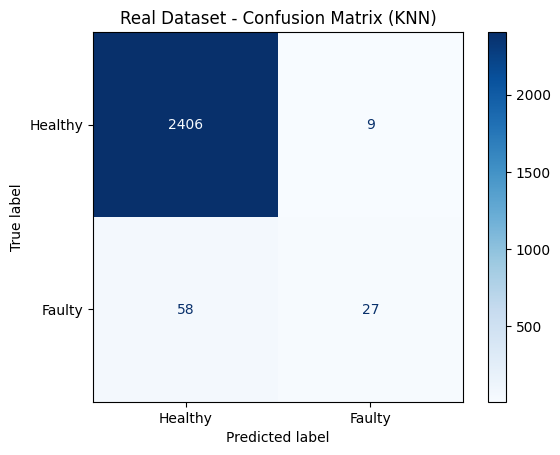

In [6]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=['Healthy','Faulty']).plot(cmap='Blues')
plt.title('Real Dataset - Confusion Matrix (KNN)')
plt.show()

#### ROC curve

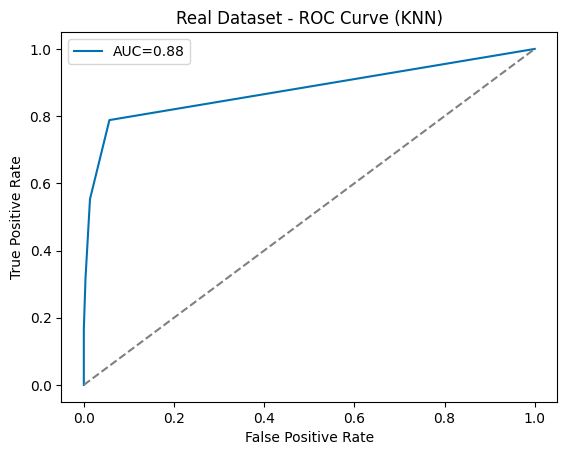

In [7]:
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC={roc_auc:.2f}')
plt.plot([0,1],[0,1],'--',color='gray')
plt.title('Real Dataset - ROC Curve (KNN)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#### ✅ Summary
- KNN predicts a machine’s health based on similar historical sensor readings.
- It’s intuitive, non-parametric, and easy to implement.
- Scaling features is essential for correct distance-based comparisons.
- The balance between precision and recall determines its usefulness in predictive maintenance.